# Fake News Classification

[Source link](https://github.com/anujvyas/Natural-Language-Processing-Projects/tree/master/Fake%20News%20Classification)

## Unzipping datasets

In [1]:
# !pip install py7zr
import py7zr
from pathlib import Path

def extract_database(zipped_file, extracted_file):
    if not Path(extracted_file).exists():
        print(f"The file '{extracted_file}' does not exist. Unzipping...")

        with py7zr.SevenZipFile(zipped_file, 'r') as zip_ref:
            zip_ref.extractall("./data/")

        print("Unzip completed successfully.")
    else:
        print(f"The file '{extracted_file}' already exists, skipping unzip.")

In [2]:
extracted_train = "./data/kaggle_fake_train.csv"
zipped_train = "./data/kaggle_fake_train.7z"
extract_database(zipped_train, extracted_train)

extracted_test = "./data/kaggle_fake_test.csv"
zipped_test = "./data/kaggle_fake_test.7z"
extract_database(zipped_test, extracted_test)

The file './data/kaggle_fake_train.csv' already exists, skipping unzip.
The file './data/kaggle_fake_test.csv' already exists, skipping unzip.


## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.read_csv("./data/kaggle_fake_train.csv").head(1)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1


In [5]:
# Loading the dataset
df = pd.read_csv("./data/kaggle_fake_train.csv", index_col="id")
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Exploring the dataset

In [6]:
df.shape

(20800, 4)

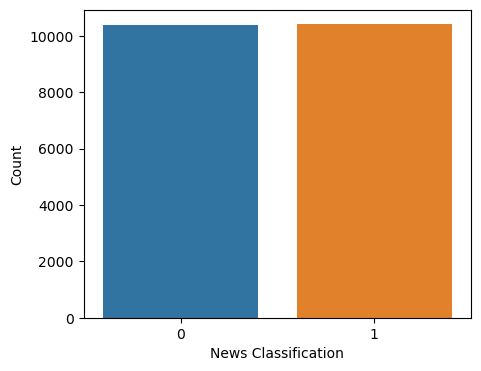

In [7]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(5,4))
sns.countplot(df, x="label")
plt.xlabel("News Classification")
plt.ylabel("Count");

## Data Cleaning and Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


In [9]:
# Finding any NaN values
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# Dropping NaN values
df.dropna(inplace=True)
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [11]:
import nltk
import re
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
# Cleaning the news
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

for title in df["title"]:
    # Cleaning special character from the news-title
    title = re.sub(pattern="[^a-zA-Z]", repl=" ", string=title)
    # Converting the entire news-title to lower case
    title = title.lower()
    # Tokenizing the news-title by words
    words = title.split()
    # Removing the stopwords
    words = [word for word in words if word not in stop_words]
    # Stemming the words
    words = [ps.stem(word) for word in words]
    # Joining the stemmed words
    title = " ".join(words)
    # Building a corpus of news-title
    corpus.append(title)

In [13]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

## Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = df["label"]

print(f"X {X.shape}")
print(f"y {y.shape}")
print(f"First five rows of X:\n{X[:5]}")

X (18285, 5000)
y (18285,)
First five rows of X:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Model Building

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test  shapes : X = {X_test.shape},  y = {y_test.shape}")

Train shapes : X = (14628, 5000), y = (14628,)
Test  shapes : X = (3657, 5000),  y = (3657,)


## *Multinomial Naive Bayes*

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2040
           1       0.87      0.91      0.89      1617

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



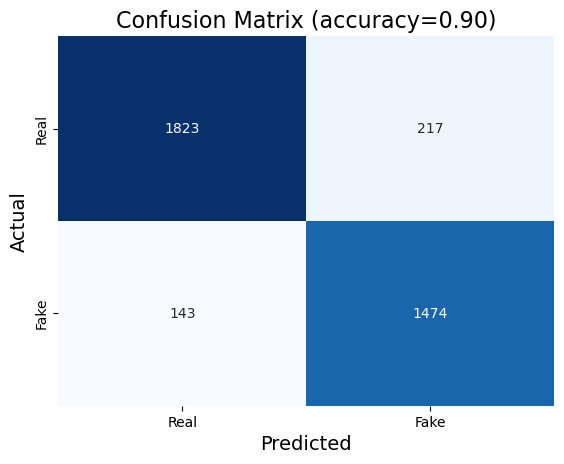

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_nb = nb_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(
    cm, annot=True, cmap="Blues", cbar=False, fmt="d", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"]
)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## *Logistic Regression*

In [20]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2040
           1       0.89      0.97      0.93      1617

    accuracy                           0.94      3657
   macro avg       0.93      0.94      0.93      3657
weighted avg       0.94      0.94      0.94      3657



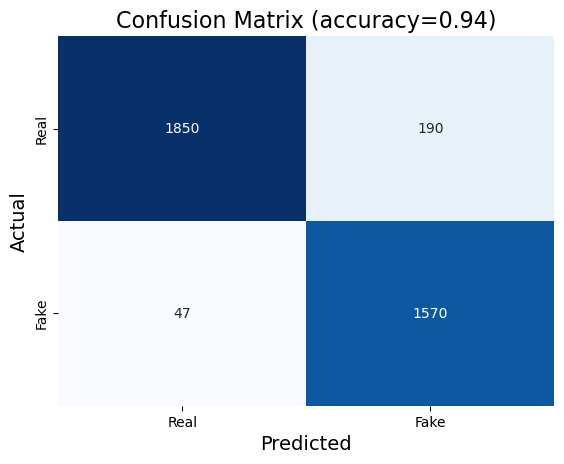

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_lr = lr_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(
    cm, annot=True, cmap="Blues", cbar=False, fmt="d", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"]
)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Live Prediction

In [22]:
def fake_news(sample_news):
    sample_news = re.sub(pattern="[^a-zA-Z]",repl=" ", string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in stop_words]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = " ".join(final_news)

    temp = cv.transform([final_news]).toarray()
    result = lr_classifier.predict(temp)
    if result:
        print("Prediction: This is a FAKE news!")
    else:
        print("Prediction: This is a REAL news.")

    return result

In [23]:
# Importing test dataset
df_test = pd.read_csv("./data/kaggle_fake_test.csv")
news_title = df_test["title"]
df_test.head(3)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [24]:
np.random.seed(101)
n = news_title.shape[0]-1
rows = np.random.randint(0, n, 5)
for row in rows:
    sample_news = news_title[row]
    print(f"News: {sample_news}")
    fake_news(sample_news)
    print()

News: Italy Just Handed the Global Economy Another Giant Variable - The New York Times
Prediction: This is a REAL news.

News: Mudslide on major highway in Colombia kills at least 6
Prediction: This is a FAKE news!

News: US-Korean Relations and the New US President | New Eastern Outlook
Prediction: This is a FAKE news!

News: California Official Says Trump’s Claim of Voter Fraud Is ‘Absurd’ - The New York Times
Prediction: This is a REAL news.

News: Indian Business Partners Hope to Exploit Their Ties to Donald Trump - The New York Times
Prediction: This is a REAL news.

